In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from finta import TA
import hvplot.pandas
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [12]:
futoil = yf.Ticker("CLZ22.NYM")

futoil_df = futoil.history(period="150d")
futoil_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-26,91.220001,93.849998,90.449997,92.889999,50196,0,0
2022-04-27,93.099998,93.699997,91.570000,93.110001,41087,0,0
2022-04-28,92.919998,94.410004,91.440002,94.150002,62628,0,0
2022-04-29,93.800003,95.709999,92.809998,93.330002,54160,0,0
2022-05-02,92.610001,94.739998,90.709999,93.940002,54234,0,0
...,...,...,...,...,...,...,...
2022-10-11,89.750000,90.150002,86.589996,87.970001,187518,0,0
2022-10-12,87.250000,88.660004,85.050003,86.059998,211342,0,0
2022-10-13,86.010002,88.379997,84.430000,87.949997,185657,0,0


In [13]:
futoil_df = futoil_df.drop(columns=["Dividends", "Stock Splits"])

futoil_df

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-26,91.220001,93.849998,90.449997,92.889999,50196
2022-04-27,93.099998,93.699997,91.570000,93.110001,41087
2022-04-28,92.919998,94.410004,91.440002,94.150002,62628
2022-04-29,93.800003,95.709999,92.809998,93.330002,54160
2022-05-02,92.610001,94.739998,90.709999,93.940002,54234
...,...,...,...,...,...
2022-10-11,89.750000,90.150002,86.589996,87.970001,187518
2022-10-12,87.250000,88.660004,85.050003,86.059998,211342
2022-10-13,86.010002,88.379997,84.430000,87.949997,185657


In [14]:
futoil_df["Price Weighted Moving AVG"] = futoil_df["Close"].rolling(window=30).mean()

In [15]:
futoil_df["Volume Weighted Moving AVG"] = futoil_df["Volume"].rolling(window=30).mean()

futoil_df.head()

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG
Date,,,,,,,
2022-04-26,91.220001,93.849998,90.449997,92.889999,50196,NaN,NaN
2022-04-27,93.099998,93.699997,91.570000,93.110001,41087,NaN,NaN
2022-04-28,92.919998,94.410004,91.440002,94.150002,62628,NaN,NaN
2022-04-29,93.800003,95.709999,92.809998,93.330002,54160,NaN,NaN
2022-05-02,92.610001,94.739998,90.709999,93.940002,54234,NaN,NaN


In [16]:
futoil_df=futoil_df.dropna()

futoil_df

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG
Date,,,,,,,
2022-06-07,106.730003,108.269997,105.860001,107.580002,66737,97.845000,57708.866667
2022-06-08,107.889999,110.779999,107.570000,109.949997,60400,98.413667,58049.000000
2022-06-09,110.339996,110.739998,109.029999,109.510002,50918,98.960334,58376.700000
2022-06-10,109.379997,110.000000,106.250000,108.220001,74732,99.429333,58780.166667
2022-06-13,107.650002,109.250000,105.139999,108.099998,71809,99.921667,59368.466667
...,...,...,...,...,...,...,...
2022-10-11,89.750000,90.150002,86.589996,87.970001,187518,84.400666,127942.033333
2022-10-12,87.250000,88.660004,85.050003,86.059998,211342,84.253999,130440.366667
2022-10-13,86.010002,88.379997,84.430000,87.949997,185657,84.241999,132832.133333


In [17]:
futoil_df["Price Lower Than Weighted Moving AVG"] = futoil_df["Price Weighted Moving AVG"] > futoil_df["Close"]

C:\Users\17045\anaconda3\envs\atmdev2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
futoil_df["Volume Higher than Weighted Moving AVG"] = futoil_df["Volume Weighted Moving AVG"] > futoil_df["Volume"]

C:\Users\17045\anaconda3\envs\atmdev2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
futoil_df.tail(10)

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG,Price Lower Than Weighted Moving AVG,Volume Higher than Weighted Moving AVG
Date,,,,,,,,,
2022-10-04,82.570000,85.980003,82.330002,85.500000,156003,85.092333,116094.466667,False,False
2022-10-05,85.300003,87.419998,84.529999,86.839996,160028,84.902666,117943.566667,False,False
2022-10-06,87.120003,88.199997,86.150002,87.589996,108486,84.700666,117809.700000,False,True
2022-10-07,88.120003,92.000000,87.150002,91.349998,242273,84.693000,122573.100000,False,False
2022-10-10,92.230003,92.339996,89.290001,89.839996,156087,84.635999,124558.966667,False,False
2022-10-11,89.750000,90.150002,86.589996,87.970001,187518,84.400666,127942.033333,False,False
2022-10-12,87.250000,88.660004,85.050003,86.059998,211342,84.253999,130440.366667,False,False
2022-10-13,86.010002,88.379997,84.430000,87.949997,185657,84.241999,132832.133333,False,False
2022-10-14,88.150002,88.519997,84.220001,84.650002,185657,84.208333,135504.200000,False,False


<AxesSubplot:>

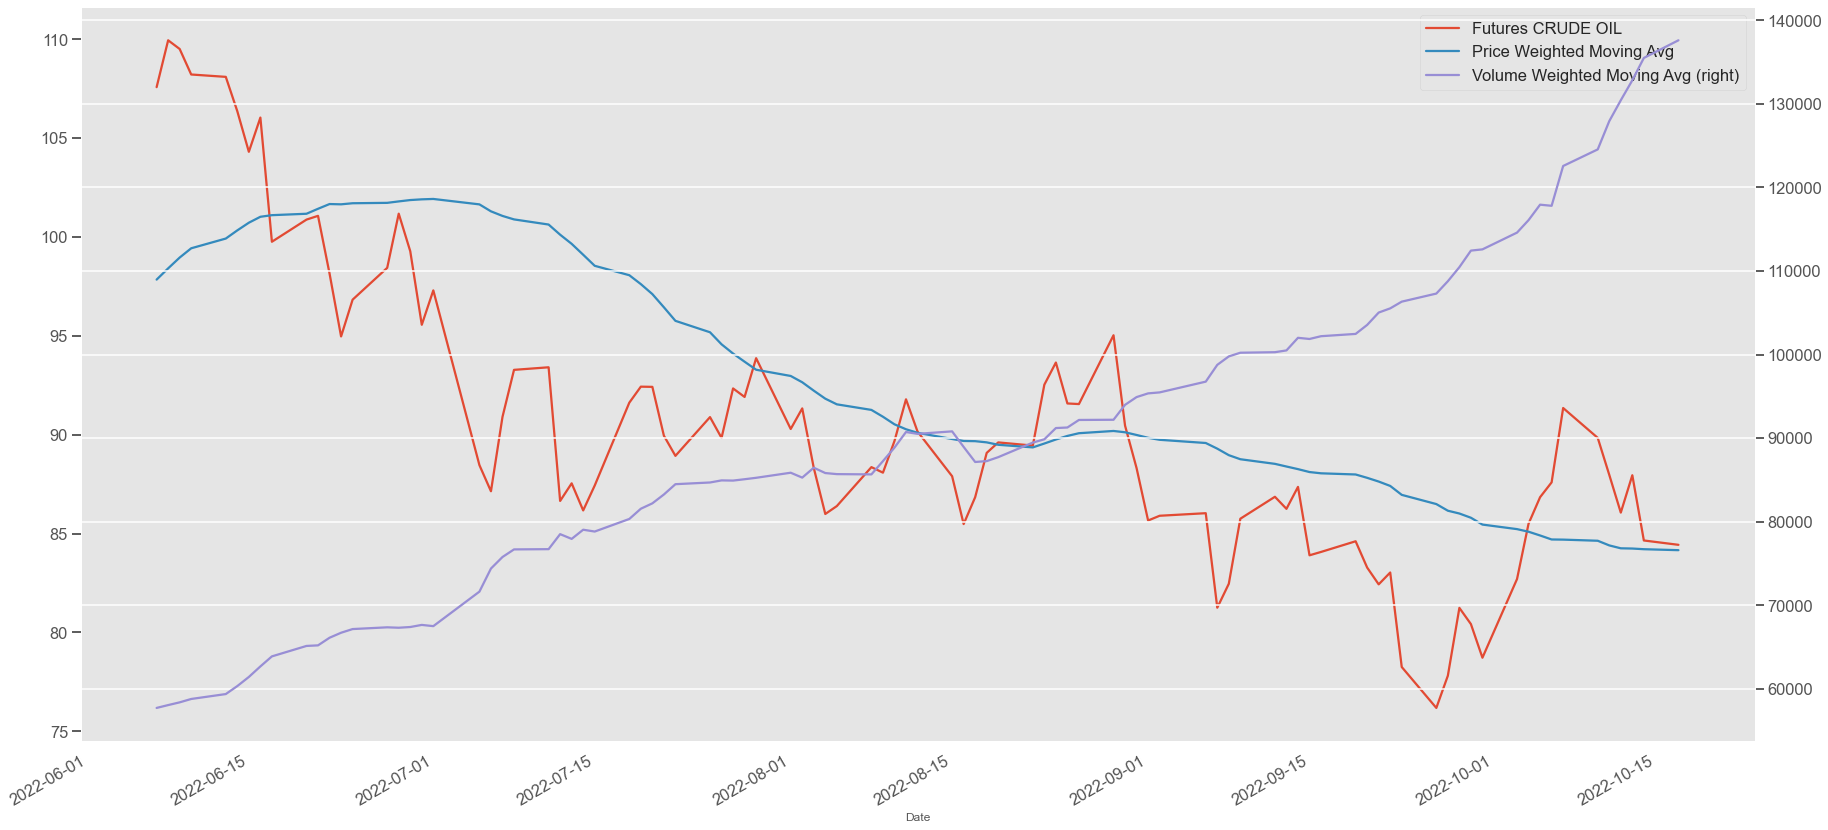

In [20]:
futoil_close_price = futoil_df["Close"]
pwmavg = futoil_df["Price Weighted Moving AVG"]
vwmavg = futoil_df["Volume Weighted Moving AVG"]

plt.rc('figure', figsize=(30,15))
plt.style.use('ggplot')

futoil_close_price.plot(label="Futures CRUDE OIL", legend=True)
pwmavg.plot(label='Price Weighted Moving Avg', legend=True)
vwmavg.plot(secondary_y = True, label="Volume Weighted Moving Avg", legend=True)

In [24]:
futoil_signals_df = pd.DataFrame()
futoil_signals_df["Close"] = futoil_df["Close"]
futoil_signals_df["Signal"] = 0.0
futoil_signals_df["Signal"] = futoil_df["Volume Higher than Weighted Moving AVG"] * futoil_df["Price Lower Than Weighted Moving AVG"]
futoil_signals_df["Signal"] = futoil_signals_df["Signal"].astype(int)
futoil_signals_df["Entry/Exit"] = futoil_signals_df["Signal"].diff()
futoil_signals_df.tail(50)


,Close,Signal,Entry/Exit
Date,,,
2022-08-08,88.360001,1,0.0
2022-08-09,88.080002,0,-1.0
2022-08-10,89.680000,0,0.0
2022-08-11,91.790001,0,0.0
2022-08-12,90.160004,0,0.0
2022-08-15,87.900002,1,1.0
2022-08-16,85.480003,0,-1.0
2022-08-17,86.839996,1,1.0
2022-08-18,89.080002,0,-1.0


In [25]:
# Visualize entry position relative to close price
entry = futoil_signals_df[futoil_signals_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = futoil_signals_df[futoil_signals_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='orange',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the futures contract
security_close = futoil_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize weighted moving averages
weighted_moving_avgs = futoil_df[["Price Weighted Moving AVG"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * weighted_moving_avgs * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (Price Weighted Moving AVG)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [26]:
z = 1
profit_or_loss = 0.00
starting_price = (futoil_df['Close'].head(1))
starting_price = float(starting_price)

ending_price = (futoil_df['Close'].tail(1))
ending_price = float(ending_price)

#returns = (profit_or_loss / starting_price)
#return_pct = "{:.2%}".format(returns)

In [28]:
print("Futures CRUDE OIL Momentum Trading Results:", "\n")
print("The starting price is: $", round(starting_price,2))
print("The ending price is: $", round(ending_price,2), "\n")

#Getting buy and sell dates
for index, row in futoil_signals_df.iterrows():
 #   if row['Volume Higher than Weighted Moving AVG'] == 1:
       # if row['Price Lower Than Weighted Moving AVG'] == 1:
    if row['Signal'] == 1:
        if row['Entry/Exit'] != -1:
            if z == 1:
                print (index, round(row['Close'],2), '- Buy')
                close = row['Close']
                profit_or_loss = profit_or_loss - close
                z = z - 1
                
    else:
     #   if row['Volume Higher than Weighted Moving AVG'] == 0:
      #      if row['Price Lower Than Weighted Moving AVG'] == 0:
            if row['Entry/Exit'] == -1:
                if z == 0:
                    print (index, round(row['Close'],2), '- Sell')
                    close = row['Close'] 
                    profit_or_loss = profit_or_loss + close
                    returns = (profit_or_loss / starting_price)
                    return_pct = "{:.2%}".format(returns)
                    print ("Total Profit/Loss is $",round(profit_or_loss,2))
                    print ("Total Return Percentage is", return_pct, "\n")
                    z = z + 1
                    

                    
entire_hold_return = (ending_price - starting_price)
entire_hold_pct = "{:.2%}".format((ending_price - starting_price) / starting_price)
print("The return for holding for the entire period was $",round(entire_hold_return,2), "or", entire_hold_pct, ".")
profit_or_loss = 0.00      

Futures CRUDE OIL Momentum Trading Results: 

The starting price is: $ 107.58
The ending price is: $ 84.43 

2022-06-27 00:00:00 98.44 - Buy
2022-06-30 00:00:00 95.56 - Sell
Total Profit/Loss is $ -2.88
Total Return Percentage is -2.68% 

2022-07-08 00:00:00 93.28 - Buy
2022-07-12 00:00:00 86.65 - Sell
Total Profit/Loss is $ -9.51
Total Return Percentage is -8.84% 

2022-07-13 00:00:00 87.54 - Buy
2022-07-14 00:00:00 86.17 - Sell
Total Profit/Loss is $ -10.88
Total Return Percentage is -10.11% 

2022-07-15 00:00:00 87.43 - Buy
2022-07-18 00:00:00 91.62 - Sell
Total Profit/Loss is $ -6.69
Total Return Percentage is -6.22% 

2022-07-25 00:00:00 90.89 - Buy
2022-07-29 00:00:00 93.87 - Sell
Total Profit/Loss is $ -3.71
Total Return Percentage is -3.45% 

2022-08-04 00:00:00 85.99 - Buy
2022-08-09 00:00:00 88.08 - Sell
Total Profit/Loss is $ -1.62
Total Return Percentage is -1.51% 

2022-08-15 00:00:00 87.9 - Buy
2022-08-16 00:00:00 85.48 - Sell
Total Profit/Loss is $ -4.04
Total Return Per

In [29]:
futoil_price_plot = futoil_df["Close"].hvplot.line(title="FUT CRUDE OIL Price")
futoil_price_plot

:Curve   [Date]   (Close)

In [33]:
futoil_price = futoil_df[['Close']]
scaler = MinMaxScaler(feature_range=(-1,1))
futoil_price['Close']=scaler.fit_transform(futoil_price['Close'].values.reshape(-1,1))

C:\Users\17045\anaconda3\envs\atmdev2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(futoil_price, lookback)

In [35]:
import torch
import torch.nn as nn
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [36]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [37]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [38]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [39]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for t in range(num_epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.0678444355726242
Epoch  1 MSE:  0.04311346262693405
Epoch  2 MSE:  0.0532001331448555
Epoch  3 MSE:  0.04435469210147858
Epoch  4 MSE:  0.041663218289613724
Epoch  5 MSE:  0.042785629630088806
Epoch  6 MSE:  0.043679144233465195
Epoch  7 MSE:  0.043013796210289
Epoch  8 MSE:  0.041249003261327744
Epoch  9 MSE:  0.039368726313114166
Epoch  10 MSE:  0.03832476586103439
Epoch  11 MSE:  0.038534391671419144
Epoch  12 MSE:  0.03856835141777992
Epoch  13 MSE:  0.03659951686859131
Epoch  14 MSE:  0.033778753131628036
Epoch  15 MSE:  0.03203829377889633
Epoch  16 MSE:  0.03102480061352253
Epoch  17 MSE:  0.028257256373763084
Epoch  18 MSE:  0.03012801520526409
Epoch  19 MSE:  0.02725904993712902
Epoch  20 MSE:  0.028279516845941544
Epoch  21 MSE:  0.027408037334680557
Epoch  22 MSE:  0.025583410635590553
Epoch  23 MSE:  0.02596726082265377
Epoch  24 MSE:  0.02542891725897789
Epoch  25 MSE:  0.02502250298857689
Epoch  26 MSE:  0.02538783848285675
Epoch  27 MSE:  0.0252008121460

In [41]:
futoil_lstm_prediction_df = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
futoil_lstm_original_df = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))
futoil_lstm_test_df = pd.DataFrame(scaler.inverse_transform(y_test_lstm.detach().numpy()))

In [42]:
lstm_futoil_plot= futoil_lstm_prediction_df.hvplot(label="LSTM Training Prediction Price") * futoil_lstm_original_df.hvplot(label="Actual Price") * futoil_lstm_test_df.hvplot(label="LSTM Test Prediction Price") 
lstm_futoil_plot

:Overlay
   .Curve.LSTM_Training_Prediction_Price :Curve   [index]   (0)
   .Curve.Actual_Price                   :Curve   [index]   (0)
   .Curve.LSTM_Test_Prediction_Price     :Curve   [index]   (0)

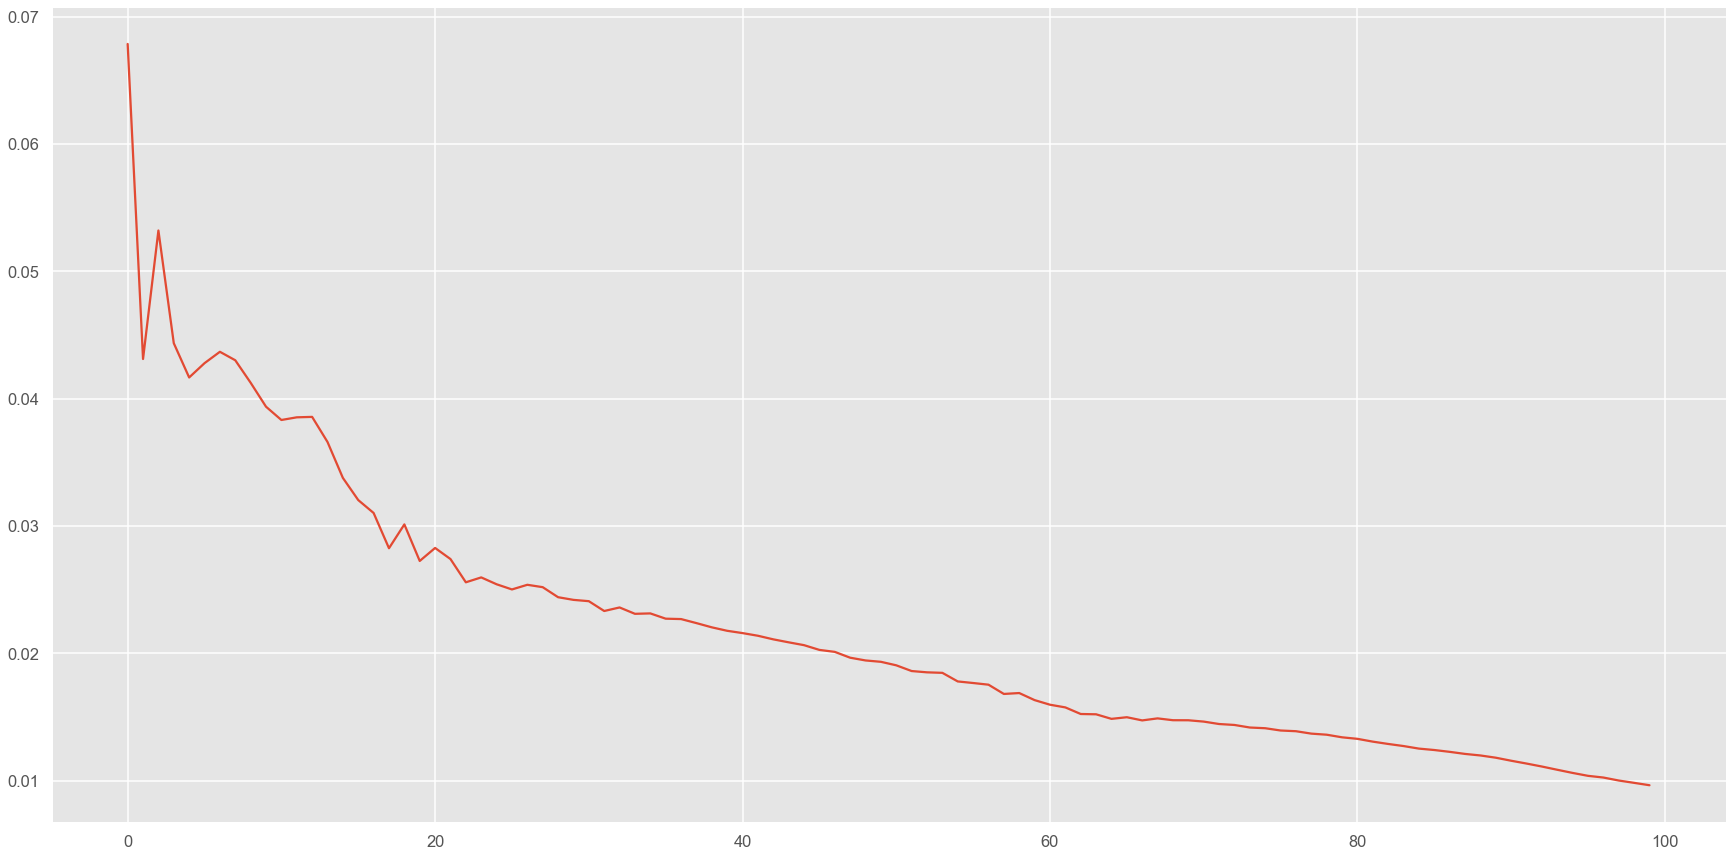

In [43]:
futoil_lstm_training_loss_plot = plt.plot(hist)
futoil_lstm_training_loss_plot

In [44]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 1.66 RMSE
Test Score: 11.39 RMSE


In [45]:
futoil_df

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG,Price Lower Than Weighted Moving AVG,Volume Higher than Weighted Moving AVG
Date,,,,,,,,,
2022-06-07,106.730003,108.269997,105.860001,107.580002,66737,97.845000,57708.866667,False,False
2022-06-08,107.889999,110.779999,107.570000,109.949997,60400,98.413667,58049.000000,False,False
2022-06-09,110.339996,110.739998,109.029999,109.510002,50918,98.960334,58376.700000,False,True
2022-06-10,109.379997,110.000000,106.250000,108.220001,74732,99.429333,58780.166667,False,False
2022-06-13,107.650002,109.250000,105.139999,108.099998,71809,99.921667,59368.466667,False,False
...,...,...,...,...,...,...,...,...,...
2022-10-11,89.750000,90.150002,86.589996,87.970001,187518,84.400666,127942.033333,False,False
2022-10-12,87.250000,88.660004,85.050003,86.059998,211342,84.253999,130440.366667,False,False
2022-10-13,86.010002,88.379997,84.430000,87.949997,185657,84.241999,132832.133333,False,False


In [46]:
futoil_df2=futoil_df

In [47]:
pd.options.mode.chained_assignment = None

In [48]:
futoil_df["Open"] = pd.to_numeric(futoil_df["Open"])
futoil_df["Open"].describe()

count     93.000000
mean      90.716344
std        7.504254
min       75.900002
25%       86.050003
50%       89.260002
75%       93.279999
max      110.339996
Name: Open, dtype: float64

In [50]:
futoil_df["Low"] = pd.to_numeric(futoil_df["Low"])
futoil_df["Low"].describe()

count     93.000000
mean      88.511720
std        7.267593
min       75.699997
25%       84.470001
50%       86.800003
75%       90.790001
max      109.029999
Name: Low, dtype: float64

In [52]:
futoil_df["Close"] = pd.to_numeric(futoil_df["Close"])
futoil_df["Close"].describe()

count     93.000000
mean      90.503978
std        7.352570
min       76.180000
25%       86.029999
50%       89.080002
75%       93.279999
max      109.949997
Name: Close, dtype: float64

In [53]:
futoil_df["Price Weighted Moving AVG"] = pd.to_numeric(futoil_df["Price Weighted Moving AVG"])
futoil_df["Price Weighted Moving AVG"].describe()

count     93.000000
mean      92.802642
std        5.982230
min       84.159333
25%       88.258667
50%       90.275667
75%       99.102667
max      101.924667
Name: Price Weighted Moving AVG, dtype: float64

In [54]:
futoil_df["Volume Weighted Moving AVG"] = pd.to_numeric(futoil_df["Volume Weighted Moving AVG"])
futoil_df["Volume Weighted Moving AVG"].describe()

count        93.000000
mean      89559.389247
std       19312.377222
min       57708.866667
25%       76711.800000
50%       87249.733333
75%      101868.933333
max      137618.466667
Name: Volume Weighted Moving AVG, dtype: float64

In [55]:
futoil_df["Volume"] = pd.to_numeric(futoil_df["Volume"])
futoil_df["Volume"].describe()

count        93.000000
mean     104360.161290
std       35308.392137
min       50918.000000
25%       82286.000000
50%       96511.000000
75%      119457.000000
max      242273.000000
Name: Volume, dtype: float64

In [56]:
futoil_df= pd.get_dummies(futoil_df, columns=['Price Lower Than Weighted Moving AVG', "Volume Higher than Weighted Moving AVG"])
futoil_df= futoil_df.astype(float)
futoil_df

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG,Price Lower Than Weighted Moving AVG_False,Price Lower Than Weighted Moving AVG_True,Volume Higher than Weighted Moving AVG_False,Volume Higher than Weighted Moving AVG_True
Date,,,,,,,,,,,
2022-06-07,106.730003,108.269997,105.860001,107.580002,66737.0,97.845000,57708.866667,1.0,0.0,1.0,0.0
2022-06-08,107.889999,110.779999,107.570000,109.949997,60400.0,98.413667,58049.000000,1.0,0.0,1.0,0.0
2022-06-09,110.339996,110.739998,109.029999,109.510002,50918.0,98.960334,58376.700000,1.0,0.0,0.0,1.0
2022-06-10,109.379997,110.000000,106.250000,108.220001,74732.0,99.429333,58780.166667,1.0,0.0,1.0,0.0
2022-06-13,107.650002,109.250000,105.139999,108.099998,71809.0,99.921667,59368.466667,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11,89.750000,90.150002,86.589996,87.970001,187518.0,84.400666,127942.033333,1.0,0.0,1.0,0.0
2022-10-12,87.250000,88.660004,85.050003,86.059998,211342.0,84.253999,130440.366667,1.0,0.0,1.0,0.0
2022-10-13,86.010002,88.379997,84.430000,87.949997,185657.0,84.241999,132832.133333,1.0,0.0,1.0,0.0


In [57]:
target_price = futoil_df2[['Close']]
target_price = futoil_df2.astype(float)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(futoil_df, target_price, test_size = 0.2, random_state = 7)

In [60]:
dtype= torch.float
X_train_tensor = torch.tensor(X_train.values, dtype=dtype)
X_test_tensor = torch.tensor(X_test.values, dtype=dtype)

y_train_tensor = torch.tensor(y_train.values, dtype=dtype)
y_test_tensor = torch.tensor(y_test.values, dtype=dtype)

In [61]:
inp = 11
out = 1
hid = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001

In [62]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                           torch.nn.Sigmoid(),
                           torch.nn.Linear(hid, out))

In [63]:
for iter in range(1000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    
    if iter % 100 == 0:
        print(iter, loss.item())
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

C:\Users\17045\anaconda3\envs\atmdev2\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([74, 9])) that is different to the input size (torch.Size([74, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 2332043520.0
100 1904893824.0
200 1859806336.0
300 1854845696.0
400 1854096896.0
500 1853795712.0
600 1853547264.0
700 1853309696.0
800 1853079168.0
900 1852854912.0


In [64]:
torch.save(model, 'fut eur price')

In [65]:
saved_model = torch.load('fut eur price')

In [66]:
y_pred_tensor = saved_model(X_test_tensor)

In [67]:
y_pred = y_pred_tensor.detach().numpy()

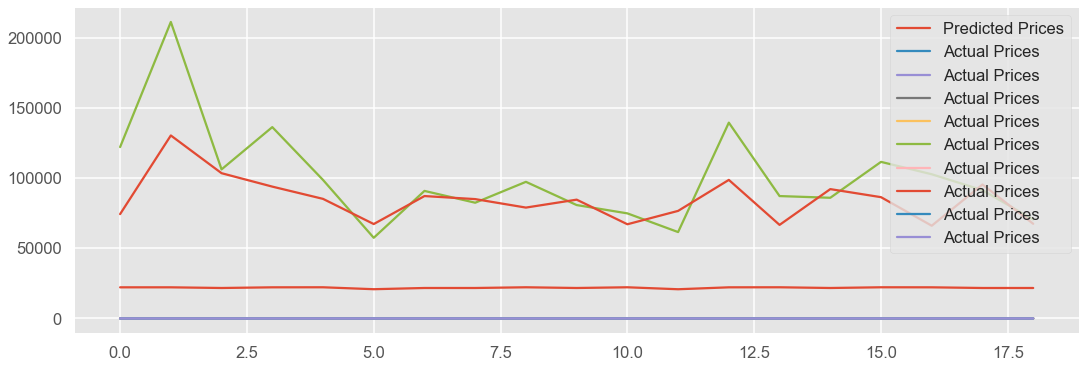

In [68]:
plt.figure(figsize=(18,6))
plt.plot(y_pred, label='Predicted Prices')
plt.plot(y_test.values, label = 'Actual Prices')

plt.legend()
plt.show()